In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from optimus import Optimus
from optimus.profiler.functions import print_json as j

In [4]:
# Create optimus
op = Optimus(master="local[*]", app_name = "optimus" ,verbose =True, checkpoint= True)


                             ____        __  _                     
                            / __ \____  / /_(_)___ ___  __  _______
                           / / / / __ \/ __/ / __ `__ \/ / / / ___/
                          / /_/ / /_/ / /_/ / / / / / / /_/ (__  ) 
                          \____/ .___/\__/_/_/ /_/ /_/\__,_/____/  
                              /_/                                  
                              
Transform and Roll out...
Just checking that all necessary environments vars are present...
-----
HADOOP_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
PYSPARK_PYTHON=python
SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
JAVA_HOME=C:\Program Files\Java\jdk1.8.0_181
Pyarrow Installed
-----
Starting or getting SparkSession and SparkContext...
Setting checkpoint folder local. If you are in a cluster initialize Optimus with master='your_ip' as param
Deleting previous folder if exists...
Creating the checkpoint directory...
Optimus successfully imported. Have

In [5]:
df = op.read.csv("Meteorite_Landings.csv", header=True)

In [6]:
df.table()

name (string),id (string),nametype (string),recclass (string),mass (g) (string),fall (string),year (string),reclat (string),reclong (string),GeoLocation (string)
Aachen,1,Valid,L5,21,Fell,01/01/1880⸱12:00:00⸱AM,50.775000,6.083330,"(50.775000,⸱6.083330)"
Aarhus,2,Valid,H6,720,Fell,01/01/1951⸱12:00:00⸱AM,56.183330,10.233330,"(56.183330,⸱10.233330)"
Abee,6,Valid,EH4,107000,Fell,01/01/1952⸱12:00:00⸱AM,54.216670,-113.000000,"(54.216670,⸱-113.000000)"
Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976⸱12:00:00⸱AM,16.883330,-99.900000,"(16.883330,⸱-99.900000)"
Achiras,370,Valid,L6,780,Fell,01/01/1902⸱12:00:00⸱AM,-33.166670,-64.950000,"(-33.166670,⸱-64.950000)"
Adhi⸱Kot,379,Valid,EH4,4239,Fell,01/01/1919⸱12:00:00⸱AM,32.100000,71.800000,"(32.100000,⸱71.800000)"
Adzhi-Bogdo⸱(stone),390,Valid,LL3-6,910,Fell,01/01/1949⸱12:00:00⸱AM,44.833330,95.166670,"(44.833330,⸱95.166670)"
Agen,392,Valid,H5,30000,Fell,01/01/1814⸱12:00:00⸱AM,44.216670,0.616670,"(44.216670,⸱0.616670)"
Aguada,398,Valid,L6,1620,Fell,01/01/1930⸱12:00:00⸱AM,-31.600000,-65.233330,"(-31.600000,⸱-65.233330)"
Aguila⸱Blanca,417,Valid,L,1440,Fell,01/01/1920⸱12:00:00⸱AM,-30.866670,-64.550000,"(-30.866670,⸱-64.550000)"


In [7]:
import timeit
from optimus.helpers.functions import print_json as pj

In [8]:
from optimus.profiler.profiler import Profiler
profiler = Profiler()

Processing column 'id'...
Using 'column_exp' to process column 'id_buckets' with function _bucketizer
Processing column 'mass (g)'...
Using 'column_exp' to process column 'mass (g)_buckets' with function _bucketizer
Processing column 'reclat'...
Using 'column_exp' to process column 'reclat_buckets' with function _bucketizer


Number of columns,10
Number of rows,45716
Total Missing (%),0.4891941552191793%
Total size in memory,98.5MiB
Categorical,0
Numeric,3
Date,0
Bool,
Not available,0
Distinct count,42365
Unique (%),92.67

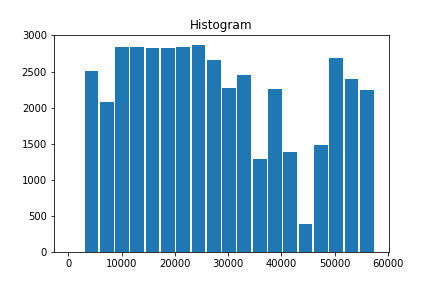
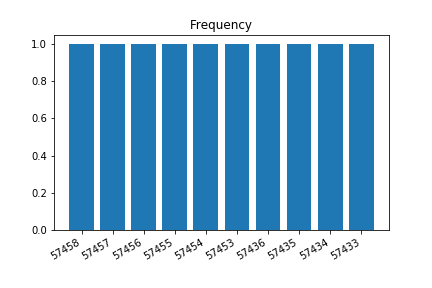
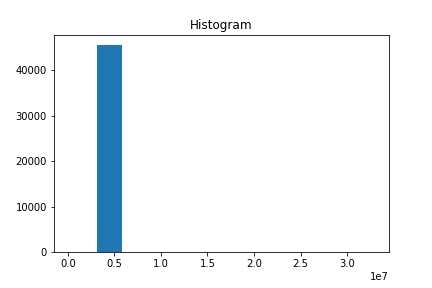
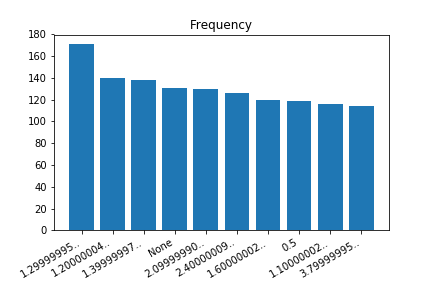
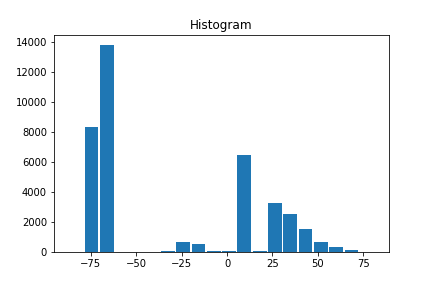
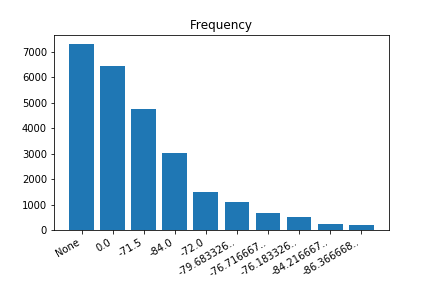

name (string),id (string),nametype (string),recclass (string),mass (g) (string),fall (string),year (string),reclat (string),reclong (string),GeoLocation (string)
Aachen,1,Valid,L5,21,Fell,01/01/1880⸱12:00:00⸱AM,50.775000,6.083330,"(50.775000,⸱6.083330)"
Aarhus,2,Valid,H6,720,Fell,01/01/1951⸱12:00:00⸱AM,56.183330,10.233330,"(56.183330,⸱10.233330)"
Abee,6,Valid,EH4,107000,Fell,01/01/1952⸱12:00:00⸱AM,54.216670,-113.000000,"(54.216670,⸱-113.000000)"
Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976⸱12:00:00⸱AM,16.883330,-99.900000,"(16.883330,⸱-99.900000)"
Achiras,370,Valid,L6,780,Fell,01/01/1902⸱12:00:00⸱AM,-33.166670,-64.950000,"(-33.166670,⸱-64.950000)"
Adhi⸱Kot,379,Valid,EH4,4239,Fell,01/01/1919⸱12:00:00⸱AM,32.100000,71.800000,"(32.100000,⸱71.800000)"
Adzhi-Bogdo⸱(stone),390,Valid,LL3-6,910,Fell,01/01/1949⸱12:00:00⸱AM,44.833330,95.166670,"(44.833330,⸱95.166670)"
Agen,392,Valid,H5,30000,Fell,01/01/1814⸱12:00:00⸱AM,44.216670,0.616670,"(44.216670,⸱0.616670)"
Aguada,398,Valid,L6,1620,Fell,01/01/1930⸱12:00:00⸱AM,-31.600000,-65.233330,"(-31.600000,⸱-65.233330)"
Aguila⸱Blanca,417,Valid,L,1440,Fell,01/01/1920⸱12:00:00⸱AM,-30.866670,-64.550000,"(-30.866670,⸱-64.550000)"


28.959417184876884

In [26]:
start_time = timeit.default_timer()
Profiler.run(df, ["id","mass (g)", "reclat"])
timeit.default_timer() - start_time

### Plot profile for a specific column

In [10]:
start_time = timeit.default_timer()
Profiler.columns(df, "reclat")
timeit.default_timer() - start_time

Processing column 'reclat'...
Using 'column_exp' to process column 'reclat_buckets' with function _bucketizer


8.99586133451055

### Output a json file

In [ ]:
start_time = timeit.default_timer()
Profiler.json(df, "*")
timeit.default_timer() - start_time

### Plot histagram for multiple columns

Using 'column_exp' to process column 'id_buckets' with function _bucketizer
Using 'column_exp' to process column 'reclong_buckets' with function _bucketizer


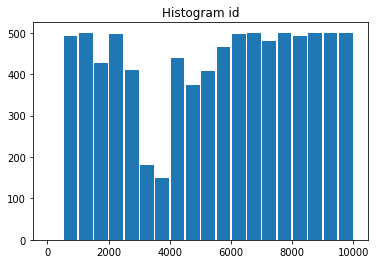

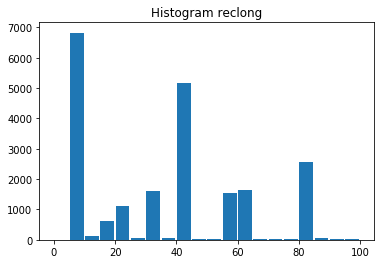

In [7]:
df.plots.hist(["id", "reclong"], 20)

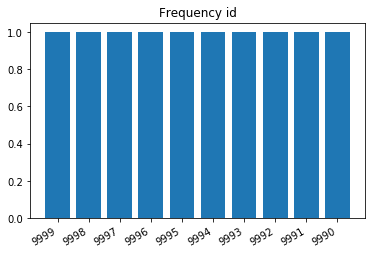

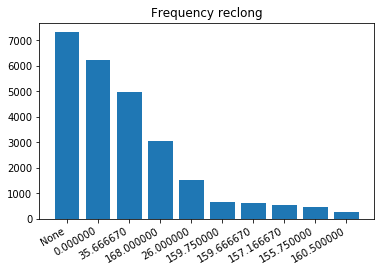

In [87]:
df.plots.frequency(["id", "reclong"], 10)

Casting id to float...
Casting mass (g) to float...
Casting reclat to float...
Imputing ['id', 'mass (g)', 'reclat'], Using 'mean'...


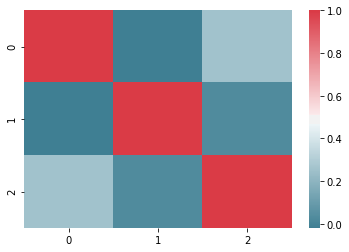

In [17]:
df.plots.correlation(["id","mass (g)", "reclat"])

In [16]:
df.correlation(["id","mass (g)", "reclat"], output="json")

Casting id to float...
Casting mass (g) to float...
Casting reclat to float...
Imputing ['id', 'mass (g)', 'reclat'], Using 'mean'...


[{'between': 'id', 'an': 'reclat', 'value': 0.25706521675680727},
 {'between': 'reclat', 'an': 'id', 'value': 0.25706521675680727},
 {'between': 'mass (g)', 'an': 'reclat', 'value': 0.02892696751028323},
 {'between': 'reclat', 'an': 'mass (g)', 'value': 0.02892696751028323},
 {'between': 'id', 'an': 'mass (g)', 'value': -0.018885182903749576},
 {'between': 'mass (g)', 'an': 'id', 'value': -0.018885182903749576}]